In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import pandas as pd
import PIL
from PIL import Image
from scipy import ndimage
import seaborn as sns
sns.set_theme(style="darkgrid")

## Data exploration

In [2]:
!ls ../data

chexpertchestxrays-u20210408  Data_processing.ipynb  solution	     train
CheXpert-v1.0-small	      labels		     student_labels
CheXpert-v1.0-small.zip       relabeling	     test


In [3]:
!ls ../data/student_labels

solution_ids.csv  test_ids.csv	train.csv  train_old.csv


In [4]:
# Train dataframe
train_df_csv = "../data/student_labels/train.csv"
train_df = pd.read_csv(train_df_csv)
train_df.head()

,Unnamed: 0,Path,Sex,Age,Frontal/Lateral,AP/PA,No Finding,Enlarged Cardiomediastinum,Cardiomegaly,Lung Opacity,Lung Lesion,Edema,Consolidation,Pneumonia,Atelectasis,Pneumothorax,Pleural Effusion,Pleural Other,Fracture,Support Devices
0,0,train/pid50512/study1/view1_frontal.jpg,Female,68,Frontal,AP,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.0,NaN,NaN,NaN,1.0
1,1,train/pid21580/study2/view1_frontal.jpg,Female,87,Frontal,AP,-1.0,NaN,0.0,1.0,NaN,0.0,0.0,NaN,0.0,NaN,0.0,NaN,1.0,NaN
2,2,train/pid21580/study1/view1_frontal.jpg,Female,83,Frontal,AP,-1.0,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN
3,3,train/pid21580/study1/view2_lateral.jpg,Female,83,Lateral,NaN,-1.0,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN
4,4,train/pid33839/study1/view1_frontal.jpg,Male,41,Frontal,AP,-1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,-1.0,NaN,NaN,NaN,NaN


In [5]:
# Count number of non-null in each column
for col in train_df.columns:
    print(col, len(train_df) - train_df[col].isnull().sum())

Unnamed: 0 178158
Path 178158
Sex 178158
Age 178158
Frontal/Lateral 178158
AP/PA 152298
No Finding 178149
Enlarged Cardiomediastinum 38694
Cardiomegaly 40908
Lung Opacity 94764
Lung Lesion 10118
Edema 69150
Consolidation 57327
Pneumonia 21903
Atelectasis 55212
Pneumothorax 62864
Pleural Effusion 106710
Pleural Other 5437
Fracture 10648
Support Devices 100500


In [5]:
# Replace nan with 2
# train_df.fillna(2, inplace=True)

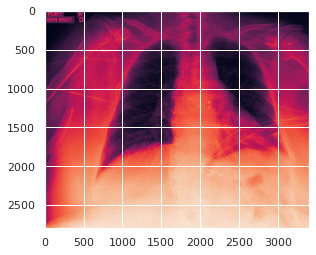

In [6]:
# Display first image
path = '../data/' + train_df["Path"][0]
# display image using matplotlib
plt.imshow(PIL.Image.open(path))

<AxesSubplot:xlabel='Sex', ylabel='count'>

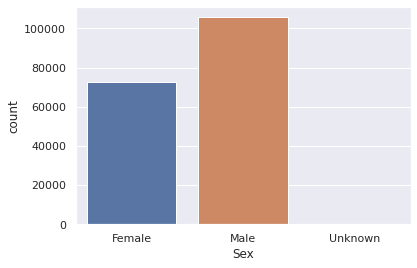

In [7]:
sns.countplot(x="Sex", data=train_df)

<AxesSubplot:xlabel='Frontal/Lateral', ylabel='count'>

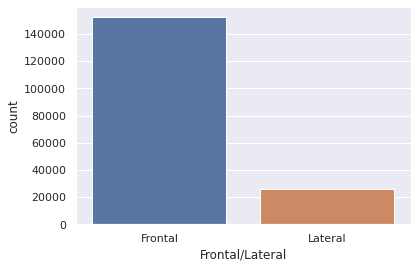

In [8]:
sns.countplot(x="Frontal/Lateral", data=train_df)

<AxesSubplot:xlabel='Frontal/Lateral', ylabel='count'>

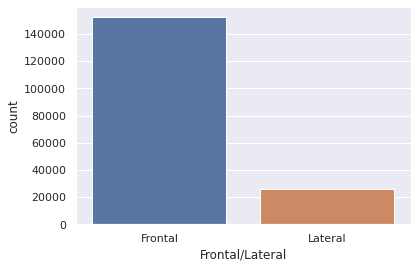

In [9]:
sns.countplot(x="Frontal/Lateral", data=train_df)

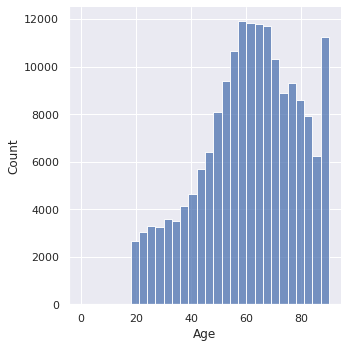

In [10]:
sns.displot(train_df, x="Age", binwidth=3)

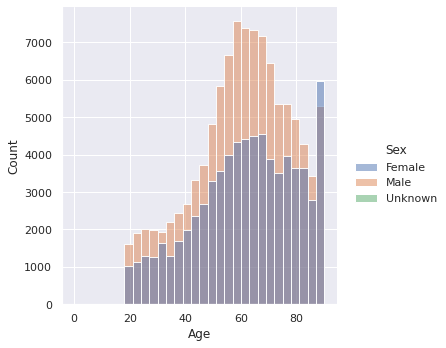

In [11]:
sns.displot(train_df, x="Age", binwidth=3, hue="Sex")

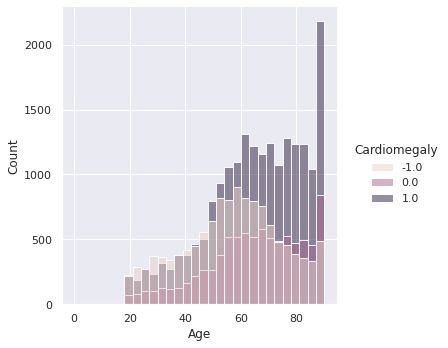

In [12]:
sns.displot(train_df, x="Age", binwidth=3, hue="Cardiomegaly")

Note: 1 (positive, present), 0 (uncertain), -1 (negative, absent), or blank (unmentioned, effectively missing datapoints)

14


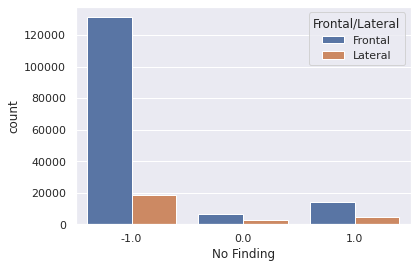

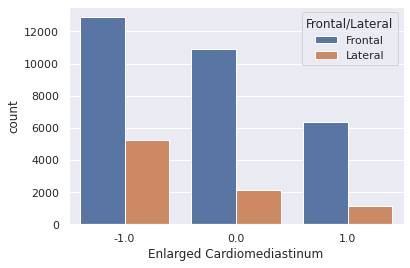

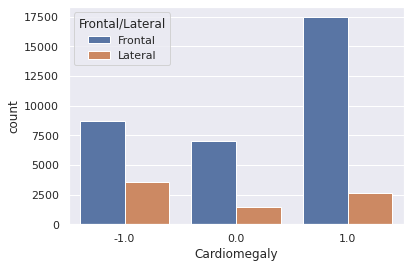

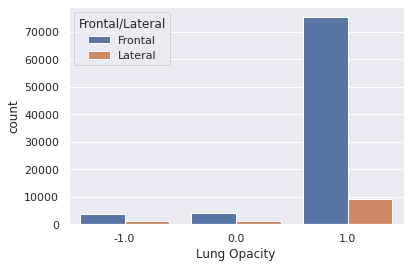

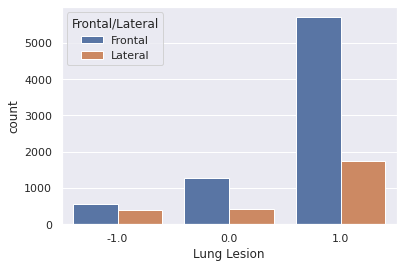

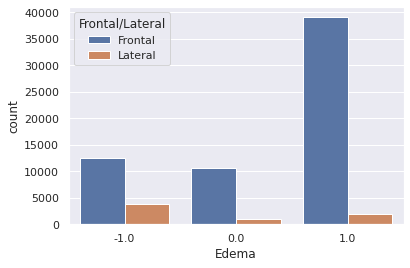

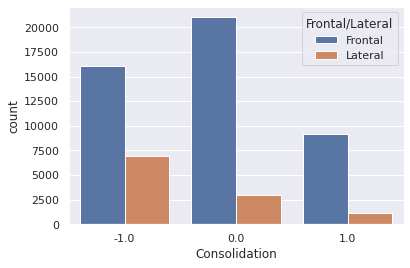

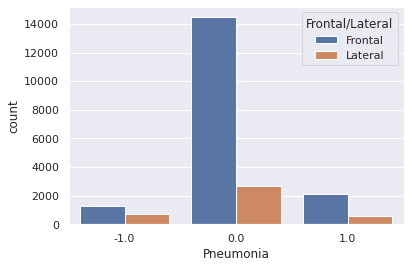

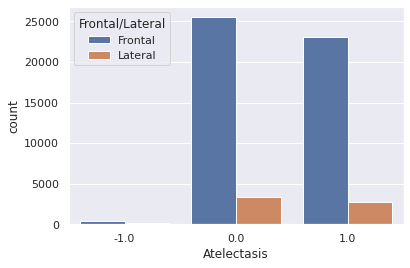

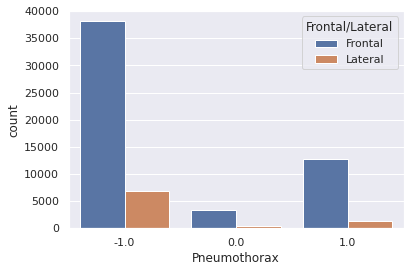

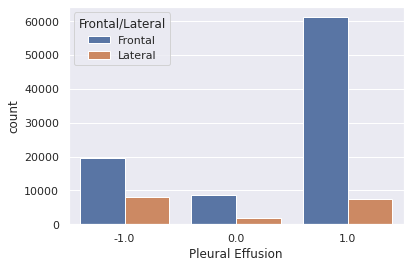

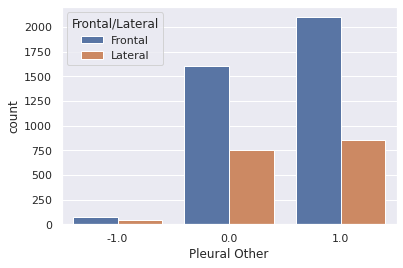

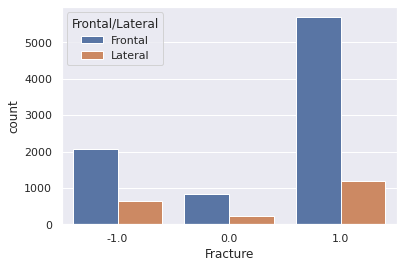

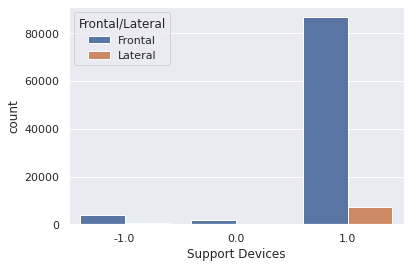

In [13]:
diseases = train_df.columns[6:]
print(len(diseases))
for disease in diseases:
    sns.countplot(x=disease, data=train_df, hue="Frontal/Lateral")
    plt.show()

Important Note: Above plots ignore NaN values

In [14]:
train_df.shape

(178158, 20)

In [ ]:
# Check if there are any correlations between the columns


In [28]:
# get all rows with positive positive Pneumonia
first_feature = "Cardiomegaly"
second_feature = "Enlarged Cardiom"
positive_df = train_df[train_df[first_feature] == 1]
# count the number of rows with positive second_feature
positive_df[second_feature].value_counts()

 1.0    10927
 0.0      445
-1.0      250
Name: Lung Opacity, dtype: int64

In [2]:
all_df = pd.read_csv("../data/all_train.csv")

In [3]:
all_df.head()

,Unnamed: 0,Path,Sex,Age,Frontal/Lateral,AP/PA,No Finding,Enlarged Cardiomediastinum,Cardiomegaly,Lung Opacity,Lung Lesion,Edema,Consolidation,Pneumonia,Atelectasis,Pneumothorax,Pleural Effusion,Pleural Other,Fracture,Support Devices
0,0,train/pid50512/study1/view1_frontal.jpg,Female,68,Frontal,AP,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.0,NaN,NaN,NaN,1.0
1,1,train/pid21580/study2/view1_frontal.jpg,Female,87,Frontal,AP,-1.0,NaN,0.0,1.0,NaN,0.0,0.0,NaN,0.0,NaN,0.0,NaN,1.0,NaN
2,2,train/pid21580/study1/view1_frontal.jpg,Female,83,Frontal,AP,-1.0,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN
3,3,train/pid21580/study1/view2_lateral.jpg,Female,83,Lateral,NaN,-1.0,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN
4,4,train/pid33839/study1/view1_frontal.jpg,Male,41,Frontal,AP,-1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,-1.0,NaN,NaN,NaN,NaN


In [9]:
from matplotlib import pyplot as plt
plt.figure(figsize=(15,8))


<Figure size 1080x576 with 0 Axes>

<Figure size 1080x576 with 0 Axes>

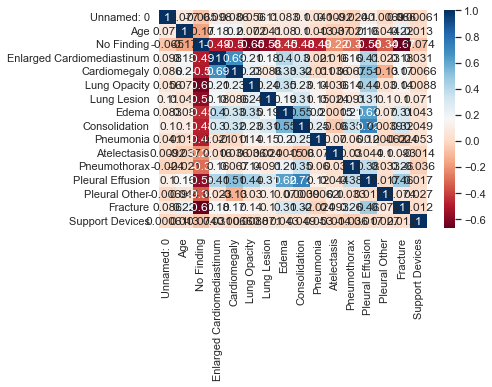

In [10]:
# print correlation matrix
corr = all_df.corr()
ax = sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            annot=True,
            cmap="RdBu")


NameError: name 'data' is not defined